# Initialize

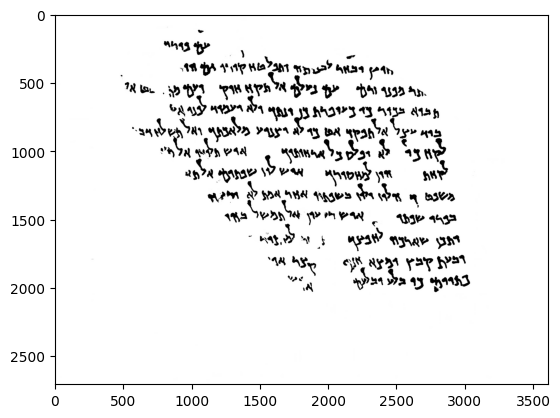

In [37]:
import cv2
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
img = cv2.imread("../image-data/P123-Fg001-R-C01-R01-binarized.jpg")
plt.imshow(img)

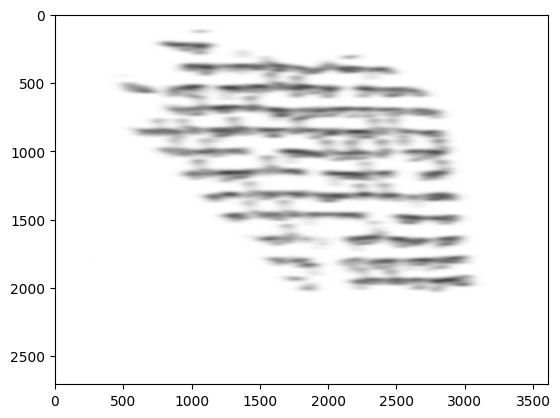

In [38]:
# step 1: blur, more horizontally than vertically
blur = cv2.GaussianBlur(img, (301,51), 0)
plt.imshow(blur)

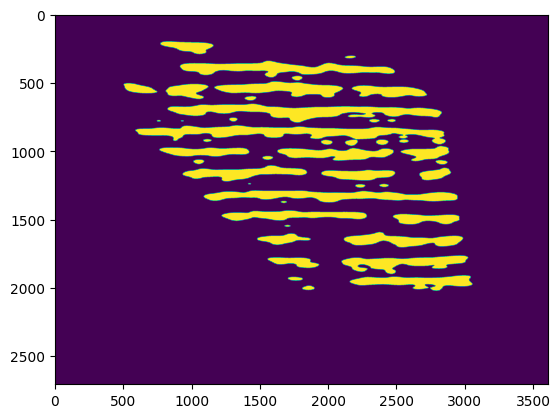

In [39]:
# step 2: threshold
img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2)

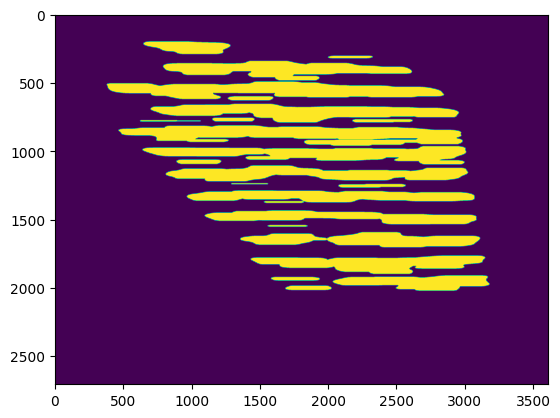

In [40]:
# step 3: dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (250,1))
mask = cv2.morphologyEx(thresh2, cv2.MORPH_DILATE, kernel)
plt.imshow(mask)

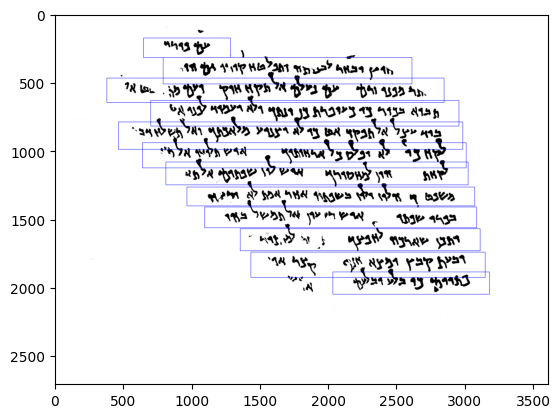

In [41]:
# step 4: identify contours and draw bounding boxes
bboxes = []
bboxes_img = img.copy()
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    if w * h < 50000: continue
    #cv2.rectangle(bboxes_img, (x, 2*y+h//2), (x+w, 2*y+h//2+h), (0,0,255), 2)
    cv2.rectangle(bboxes_img, (x, y - 25 ), (x+w, y+h + 25), (0,0,255), 2)
    bboxes.append((x,y,w,h))
plt.imshow(bboxes_img)
plt.show()

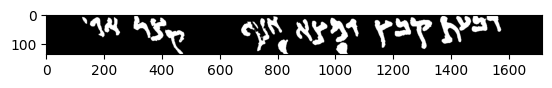

In [44]:
# single line:
x,y,w,h = bboxes[1]
crop_img = img[y:y+h, x:x+w]
ret, crop_img = cv2.threshold(crop_img, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(crop_img)

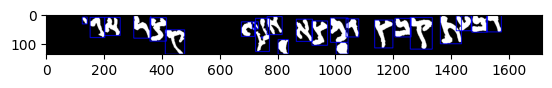

In [45]:
# basic character segmentation
bboxes_img = crop_img.copy()
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
contours = cv2.findContours(crop_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    #if w * h < 500: continue
    cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 2)
plt.imshow(bboxes_img)